In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

fake_news = pd.read_csv("../input/fake.csv")
fake_news.head(10)

# Any results you write to the current directory are saved as output.

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,25689.0,Hillary Goes Absolutely Berserk On Protester A...,0.000,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,0,1,0,0,0,bias
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,25689.0,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,25689.0,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,25689.0,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,25689.0,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


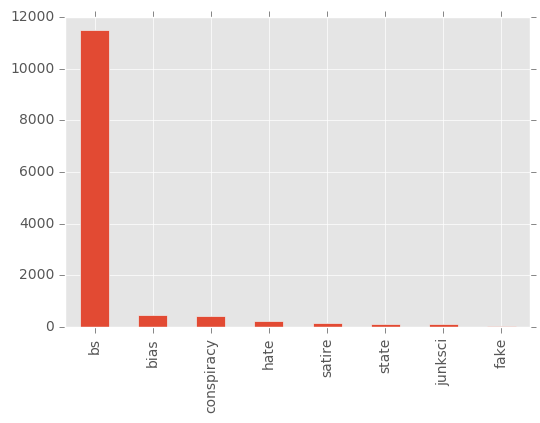

In [2]:
fake_news.type.value_counts().plot(kind='bar')

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fake_news, test_size = 0.2)
#print(len(train),len(test))

train_one = train[train["language"]=="english"]
test_one = test[test["language"]=="english"]
#train_one.columns.values
#print(len(test_one),len(train_one))
#import nltk
from nltk.corpus import stopwords 
train.columns.values
#Text_col = train["text"]
#Author_col = train["author"]
#Site_col = train["site_url"]
#Title_col = train["title"]
#Thread_col = train["thread_title"]
train.head()


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
11778,55582efefd25a59641685e9b0777e19588ea3ecb,0,Arnaldo Rodgers,2016-10-30T00:54:00.000+03:00,Veterans may face higher risk of suicide durin...,‹ › Arnaldo Rodgers is a trained and educated ...,english,2016-10-30T02:48:56.661+02:00,veteransnewsnow.com,US,NaN,Veterans may face higher risk of suicide durin...,0.000,NaN,0,1,0,0,0,bs
11223,0aa6050b4110095c9862433e64ad563ae0fe3f04,0,NaN,2016-10-30T02:06:42.987+02:00,Photo of the Week: President Who Let Citigroup...,$19 Photo of the Week: President Who Let Citig...,english,2016-10-30T02:06:42.987+02:00,truthdig.com,US,23405.0,Photo of the Week: President Who Let Citigroup...,0.000,http://www.truthdig.com/images/eartothegroundu...,0,0,0,0,0,bs
10443,2b68b1816244abd1f1dc4e7ef5c6b3f7e679c5a5,0,Bradlee Dean,2016-10-31T00:29:00.000+02:00,Americans Want Hillary In Jail – Rightly So! (...,Truth Bomb from Rasmussen: More Americans Want...,english,2016-10-31T21:06:00.429+02:00,thesleuthjournal.com,US,NaN,Americans Want Hillary In Jail – Rightly So! (...,0.000,http://www.thesleuthjournal.com/wp-content/upl...,0,1,0,0,0,bs
3212,a079139068783a01bd847272ada8be9ecda6942d,0,lynnmccrann,2016-10-31T22:24:42.214+02:00,Comment on Hollyweird Clinton supporters are s...,What is it with Clinton’s Hollyweird supporter...,english,2016-10-31T22:24:42.214+02:00,fellowshipoftheminds.com,US,NaN,Comment on Hollyweird Clinton supporters are s...,0.000,https://fellowshipofminds.files.wordpress.com/...,0,1,0,0,0,bs
11314,d21c80e48073dc6e950e51ded44cc7d54fc41a58,0,Amy Moreno,2016-10-31T21:24:05.540+02:00,SHOCK VIDEO : How American Elections are HACKE...,SHOCK VIDEO : How American Elections are HACKE...,english,2016-10-31T21:24:05.540+02:00,truthfeed.com,US,NaN,SHOCK VIDEO : How American Elections are HACKE...,0.033,http://truthfeed.com/wp-content/uploads/2016/1...,0,0,0,0,0,bs


In [4]:
import re
def refineWords(s):
    letters_only = re.sub("[^a-zA-Z]", " ", s) 
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    #print( " ".join( meaningful_words ))
    return( " ".join( meaningful_words ))
train_one["text"].fillna(" ",inplace=True)    
train_one["text"] = train_one["text"].apply(refineWords)
train_one["author"].fillna(" ",inplace=True)    
train_one["author"] = train_one["author"].apply(refineWords)
train_one["site_url"].fillna(" ",inplace=True)    
train_one["site_url"] = train_one["site_url"].apply(refineWords)
train_one["title"].fillna(" ",inplace=True)    
train_one["title"] = train_one["title"].apply(refineWords)
train_one["thread_title"].fillna(" ",inplace=True)    
train_one["thread_title"] = train_one["thread_title"].apply(refineWords)
train_two = train_one.copy()
train_one.head()

/opt/conda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/li

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
11778,55582efefd25a59641685e9b0777e19588ea3ecb,0,arnaldo rodgers,2016-10-30T00:54:00.000+03:00,veterans may face higher risk suicide first ye...,arnaldo rodgers trained educated psychologist ...,english,2016-10-30T02:48:56.661+02:00,veteransnewsnow com,US,NaN,veterans may face higher risk suicide first ye...,0.000,NaN,0,1,0,0,0,bs
11223,0aa6050b4110095c9862433e64ad563ae0fe3f04,0,,2016-10-30T02:06:42.987+02:00,photo week president let citigroup staff cabin...,photo week president let citigroup staff cabin...,english,2016-10-30T02:06:42.987+02:00,truthdig com,US,23405.0,photo week president let citigroup staff cabin...,0.000,http://www.truthdig.com/images/eartothegroundu...,0,0,0,0,0,bs
10443,2b68b1816244abd1f1dc4e7ef5c6b3f7e679c5a5,0,bradlee dean,2016-10-31T00:29:00.000+02:00,americans want hillary jail rightly video,truth bomb rasmussen americans want hilary ind...,english,2016-10-31T21:06:00.429+02:00,thesleuthjournal com,US,NaN,americans want hillary jail rightly video,0.000,http://www.thesleuthjournal.com/wp-content/upl...,0,1,0,0,0,bs
3212,a079139068783a01bd847272ada8be9ecda6942d,0,lynnmccrann,2016-10-31T22:24:42.214+02:00,comment hollyweird clinton supporters classy a...,clinton hollyweird supporters class cases poin...,english,2016-10-31T22:24:42.214+02:00,fellowshipoftheminds com,US,NaN,comment hollyweird clinton supporters classy a...,0.000,https://fellowshipofminds.files.wordpress.com/...,0,1,0,0,0,bs
11314,d21c80e48073dc6e950e51ded44cc7d54fc41a58,0,amy moreno,2016-10-31T21:24:05.540+02:00,shock video american elections hacked truthfeed,shock video american elections hacked shock vi...,english,2016-10-31T21:24:05.540+02:00,truthfeed com,US,NaN,shock video american elections hacked truthfeed,0.033,http://truthfeed.com/wp-content/uploads/2016/1...,0,0,0,0,0,bs


In [5]:
train_one = train_two.copy()
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
#print(train_one["title"].head())
#temp  = (vectorizer.fit_transform(train_one["text"]))
#train_one["text"] = temp.to_array()
train_one["text"] = vectorizer.fit_transform(train_one["text"]).toarray()
train_one["author"] = vectorizer.fit_transform(train_one["author"]).toarray()
train_one["site_url"] = vectorizer.fit_transform(train_one["site_url"]).toarray()
train_one["title"] = vectorizer.fit_transform(train_one["title"]).toarray()
train_one["thread_title"] = vectorizer.fit_transform(train_one["thread_title"]).toarray()
train_one.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
11778,55582efefd25a59641685e9b0777e19588ea3ecb,0,0,2016-10-30T00:54:00.000+03:00,0,0,english,2016-10-30T02:48:56.661+02:00,0,US,NaN,0,0.000,NaN,0,1,0,0,0,bs
11223,0aa6050b4110095c9862433e64ad563ae0fe3f04,0,0,2016-10-30T02:06:42.987+02:00,0,0,english,2016-10-30T02:06:42.987+02:00,0,US,23405.0,0,0.000,http://www.truthdig.com/images/eartothegroundu...,0,0,0,0,0,bs
10443,2b68b1816244abd1f1dc4e7ef5c6b3f7e679c5a5,0,0,2016-10-31T00:29:00.000+02:00,0,0,english,2016-10-31T21:06:00.429+02:00,0,US,NaN,0,0.000,http://www.thesleuthjournal.com/wp-content/upl...,0,1,0,0,0,bs
3212,a079139068783a01bd847272ada8be9ecda6942d,0,0,2016-10-31T22:24:42.214+02:00,0,0,english,2016-10-31T22:24:42.214+02:00,0,US,NaN,0,0.000,https://fellowshipofminds.files.wordpress.com/...,0,1,0,0,0,bs
11314,d21c80e48073dc6e950e51ded44cc7d54fc41a58,0,0,2016-10-31T21:24:05.540+02:00,0,0,english,2016-10-31T21:24:05.540+02:00,0,US,NaN,0,0.033,http://truthfeed.com/wp-content/uploads/2016/1...,0,0,0,0,0,bs


In [6]:
#print((train_one["text"][11543]).shape)
#print(type(temp))
print(train_one.describe())
dist = np.sum(train_one, axis=0)

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       ord_in_thread       author        title         text     site_url  \
count    9902.000000  9902.000000  9902.000000  9902.000000  9902.000000   
mean        0.919309     0.000101     0.000303     0.012321     0.000202   
std         6.566516     0.010049     0.017404     0.128110     0.014211   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.000000     0.000000     0.000000     0.000000     0.000000   
50%         0.000000     0.000000     0.000000     0.000000     0.000000   
75%         0.000000     0.000000     0.000000     0.000000     0.000000   
max       100.000000     1.000000     1.000000     4.000000     1.000000   

        domain_rank  thread_title   spam_score  replies_count  \
count   6588.000000   9902.000000  9902.000000    9902.000000   
mean   38667.025956      0.000707     0.023042       1.455968   
std    26901.328927      0.026580     0.115830      10.078403   
min      486.000000      0.000000     0.000000       0.

In [7]:
train_one["domain_rank"].fillna(train_one.domain_rank.median(axis=0),inplace=True)
test_one["domain_rank"].fillna(test_one.domain_rank.median(axis=0),inplace=True)  

/opt/conda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
train_one["isSpam"] = np.sign(train_one["spam_score"]-0.5)
#print(train_one["isSpam"])
from sklearn.ensemble import RandomForestClassifier
#forest = RandomForestClassifier(n_estimators = 100)
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
features_forest = train_one[["text", "author", "site_url", "title", "thread_title","domain_rank"]].values
my_forest = forest.fit(features_forest, train_one["isSpam"])

In [9]:
target = train_one["isSpam"].values
print(my_forest.score(features_forest, target))

0.981518885074


In [10]:
test_one["text"].fillna(" ",inplace=True)    
test_one["text"] = test_one["text"].apply(refineWords)
test_one["author"].fillna(" ",inplace=True)    
test_one["author"] = test_one["author"].apply(refineWords)
test_one["site_url"].fillna(" ",inplace=True)    
test_one["site_url"] = test_one["site_url"].apply(refineWords)
test_one["title"].fillna(" ",inplace=True)    
test_one["title"] = test_one["title"].apply(refineWords)
test_one["thread_title"].fillna(" ",inplace=True)    
test_one["thread_title"] = test_one["thread_title"].apply(refineWords)
test_two = test_one.copy()



test_one["text"] = vectorizer.fit_transform(test_one["text"]).toarray()
test_one["author"] = vectorizer.fit_transform(test_one["author"]).toarray()
test_one["site_url"] = vectorizer.fit_transform(test_one["site_url"]).toarray()
test_one["title"] = vectorizer.fit_transform(test_one["title"]).toarray()
test_one["thread_title"] = vectorizer.fit_transform(test_one["thread_title"]).toarray()
test_one["isSpam"] = np.sign(test_one["spam_score"]-0.5)

/opt/conda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [11]:
test_features = test_one[["text", "author", "site_url", "title", "thread_title","domain_rank"]].values
my_prediction = my_forest.predict(test_features)
print(len(my_prediction),len(test_one["isSpam"]))

2501 2501


In [12]:
count = 0
pred = my_prediction.tolist()
test_spam = test_one["isSpam"].tolist()
for i in range(len(pred)):
    if pred[i] == test_spam[i]:
        count += 1
print(count,float(count)/len(my_prediction))
#print(my_prediction)
#print(test_spam)

2441 0.9760095961615354
